# <ins> Futuristic Airbnb </ins>

Airbnb has successfully disrupted the traditional hospitality industry as more and more travelers decide to use Airbnb as their primary accommodation provider. Since its beginning in 2008, Airbnb has seen an enormous growth, with the number of rentals listed on its website growing exponentially each year. In Germany, no city is more popular than Berlin. That implies that Berlin is one of the hottest markets for Airbnb in Europe, with over 22,552 listings as of November 2018.Here we will be using Python with some packages like Pandas and Matplotlib to analyze data  to find a better Accommodation based on customer satisfaction and to improve the Airbnb business based on certain factors in Berlin.

<hr> </hr>

In [ ]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import json
import gmaps
from datetime import datetime
import seaborn as sns
import re

In [104]:
#Reading Files and storing in Dataframes

Calendar_Summary_df = pd.read_csv("../Dataset/calendar_summary.csv", parse_dates=['date'], index_col='listing_id')
#Listings_df = pd.read_csv("../Dataset/listings.csv")
Listings_Summary_df = pd.read_csv("../Dataset/listings_summary.csv", error_bad_lines = False)
#Neighbourhoods_df = pd.read_csv("../Dataset/neighbourhoods.csv")
#Reviews_df = pd.read_csv("../Dataset/reviews.csv")
#Reviews_Summary_df = pd.read_csv("../Dataset/reviews_summary.csv")


### <ins> Identifying the Columns </ins>

In [19]:
Calendar_Summary_df.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [20]:
Listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [21]:
Listings_Summary_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [22]:
Neighbourhoods_df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In [14]:
Reviews_df.columns

Index(['listing_id', 'date'], dtype='object')

In [17]:
Reviews_Summary_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [105]:
pd.set_option('display.max_columns', len(Listings_Summary_df.columns)) 
pd.set_option('display.max_rows', 100)

### <ins> Keeping the Necessary Columns </ins>

In [106]:
#Dropping the unneccessay columns in Listings_Summary_df which is not used for analysis

Listings_Summary_df = Listings_Summary_df.drop (['listing_url', 'scrape_id','summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
        'host_url', 'host_location','host_about',
       'host_acceptance_rate', 'host_thumbnail_url',
       'host_picture_url',  'host_neighbourhood','calendar_updated','calendar_last_scraped',
        'license','jurisdiction_names'], axis =1)


In [107]:
#Determining the Null Value Data
round(( Listings_Summary_df.isna().sum()/len(Listings_Summary_df) ) * 100)

id                                   0.0
last_scraped                         0.0
name                                 0.0
host_id                              0.0
host_name                            0.0
host_since                           0.0
host_response_time                  57.0
host_response_rate                  57.0
host_is_superhost                    0.0
host_listings_count                  0.0
host_total_listings_count            0.0
host_verifications                   0.0
host_has_profile_pic                 0.0
host_identity_verified               0.0
street                               0.0
neighbourhood                        5.0
neighbourhood_cleansed               0.0
neighbourhood_group_cleansed         0.0
city                                 0.0
state                                0.0
zipcode                              3.0
market                               0.0
smart_location                       0.0
country_code                         0.0
country         

In [108]:
#The below Columns has more than 80% of NA values, hence dropping it.
Listings_Summary_df.drop(['square_feet','weekly_price', 'monthly_price'], axis=1, inplace=True)

In [109]:
#Dropping the Similar Columns
#host_listings_count and host_total_listings_count are the same in all but 248 cases. #These cases are those where the value is NaN. 
Listings_Summary_df.drop(['host_total_listings_count', 'calculated_host_listings_count'], axis=1, inplace=True)    


In [113]:
#Re-Checking
round(( Listings_Summary_df.isna().sum()/len(Listings_Summary_df) ) * 100)

id                                   0.0
last_scraped                         0.0
name                                 0.0
host_id                              0.0
host_name                            0.0
host_since                           0.0
host_response_time                  57.0
host_response_rate                  57.0
host_is_superhost                    0.0
host_listings_count                  0.0
host_verifications                   0.0
host_has_profile_pic                 0.0
host_identity_verified               0.0
street                               0.0
neighbourhood                        5.0
neighbourhood_cleansed               0.0
neighbourhood_group_cleansed         0.0
city                                 0.0
state                                0.0
zipcode                              3.0
market                               0.0
smart_location                       0.0
country_code                         0.0
country                              0.0
latitude        

In [111]:
Listings_Summary_df.head()

,id,last_scraped,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2015,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,2008-08-18,within an hour,96%,t,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$200.00,$30.00,1,$28.00,4,1125,t,0,21,51,141,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,3.76
1,2695,2018-11-07,Prenzlauer Berg close to Mauerpark,2986,Michael,2008-09-16,NaN,NaN,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,$0.00,1,$0.00,2,40,t,0,0,0,0,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,flexible,f,f,1.42
2,3176,2018-11-07,Fabulous Flat in great Location,3718,Britta,2008-10-19,within a day,100%,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,$200.00,$50.00,2,$20.00,62,1125,t,0,0,0,220,143,2009-06-20,2017-03-20,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,t,f,strict_14_with_grace_period,f,f,1.25
3,3309,2018-11-07,BerlinSpot Schöneberg near KaDeWe,4108,Jana,2008-11-07,NaN,NaN,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00,$250.00,$30.00,1,$18.00,5,360,t,0,0,22,297,25,2013-08-12,2018-08-16,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,f,f,strict_14_with_grace_period,f,f,0.39
4,7071,2018-11-07,BrightRoom with sunny greenview!,17391,Bright,2009-05-16,within an hour,100%,t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00,$0.00,$0.00,1,$24.00,2,10,t,15,26,26,26,197,2009-08-18,2018-11-04,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,moderate,f,f,1.75


### <ins> Data Cleaning </ins>

In [12]:
#Data Cleaning the Amenities Column

Amenities = Listings_Summary_df.amenities

Amenities_List = []

for x in Amenities:
        x=x.replace('"','')
        x=x.replace('{','')
        x=x.replace('}','')
        x=x.replace('Cable TV', 'TV')
        
        Amenities_List += x.split(',')

Amenities_List.remove('translation missing: en.hosting_amenity_50')
Amenities_List.remove('translation missing: en.hosting_amenity_49')
Amenities_New= pd.DataFrame(Amenities_List)
Amenities_New = Amenities_New.rename(columns = {0:"Amenities"})
Amenities_New.describe()

,Amenities
count,363474
unique,135
top,Wifi
freq,21512


In [4]:
#Data Cleanup for First_Review, Host_Since 

Listings_Summary_df.first_review = pd.to_datetime(Listings_Summary_df.first_review)
Listings_Summary_df.host_since = pd.to_datetime(Listings_Summary_df.host_since) 


In [18]:
#Data Cleanup for Price & Security Deposit , Cleaning & extra Column
Listings_Summary_df.price = Listings_Summary_df.price.str[1:-3]
Listings_Summary_df.price = Listings_Summary_df.price.str.replace(",", "")
Listings_Summary_df.price = Listings_Summary_df.price.astype('int64')
## No Null values for Price Column

Listings_Summary_df.security_deposit = Listings_Summary_df.security_deposit.str[1:-3]
Listings_Summary_df.security_deposit = Listings_Summary_df.security_deposit.str.replace(",", "")
Listings_Summary_df.security_deposit.fillna(0, inplace=True)
Listings_Summary_df.security_deposit = Listings_Summary_df.security_deposit.astype('int64')

Listings_Summary_df.cleaning_fee = Listings_Summary_df.cleaning_fee.str[1:-3]
Listings_Summary_df.cleaning_fee = Listings_Summary_df.cleaning_fee.str.replace(",", "")
Listings_Summary_df.cleaning_fee.fillna(0, inplace=True)
Listings_Summary_df.cleaning_fee = Listings_Summary_df.cleaning_fee.astype('int64')

Listings_Summary_df.extra_people = Listings_Summary_df.extra_people.str[1:-3]
Listings_Summary_df.extra_people = Listings_Summary_df.extra_people.str.replace(",", "")
Listings_Summary_df.extra_people.fillna(0, inplace=True)
Listings_Summary_df.extra_people = Listings_Summary_df.extra_people.astype('int64')

In [115]:
#Data Cleanup for host_reponse_time 
#Listings_Summary_df.host_response_time.fillna("N/A", inplace=True)
#Listings_Summary_df.host_response_time.value_counts(normalize=True)

Listings_Summary_df['host_response_rate'] = pd.to_numeric(Listings_Summary_df.host_response_rate.str.strip('%'))

In [122]:
Listings_Summary_df["host_response_rate"] = Listings_Summary_df["host_response_rate"].dropna()
Listings_Summary_df["host_response_time"] = Listings_Summary_df["host_response_time"].dropna()

In [30]:
#Data Cleanup for Property type
Listings_Summary_df.property_type.replace({
    'Condominium' : 'Apartment',
    'Loft' : 'Apartment',
    'Serviced apartment': 'Apartment',
    'Townhouse': 'House',
    'Bed and breakfast' : 'Hotel',
    'Guesthouse' : 'Guest suite',
    'Boutique hotel': 'Hotel',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Boat': 'House',
    'Camper/RV': 'Other',
    'Earth house': 'House',
    'Houseboat': 'House' ,
    'Pension (South Korea)' : 'Other',
    'Tiny house' : 'House',
    'Aparthotel' : 'Hotel',
    'Cabin' : 'Other',
    'Casa particular (Cuba)' : 'Other',
    'Castle' : 'Other',
    'Barn' : 'Other',
    'Chalet' : 'Other',
    'Island' : 'Other',
    'Tipi' : 'Other',
    'In-law' : 'Other',
    'Cave' : 'Other',
    'Train' : 'Other'
    
    }, inplace=True)

Listings_Summary_df.property_type.value_counts(normalize=True)


Apartment      0.952111
House          0.024876
Hotel          0.007272
Guest suite    0.005809
Hostel         0.005676
Other          0.003680
Villa          0.000443
Resort         0.000133
Name: property_type, dtype: float64

In [31]:
#Data Cleanup for Cancellation Policy Column

Listings_Summary_df.cancellation_policy.replace({
    'strict_14_with_grace_period' : 'strict',
    'super_strict_30': 'strict',
    'super_strict_60': 'strict'
    }, inplace=True)
Listings_Summary_df.cancellation_policy.value_counts()

flexible    9102
moderate    7096
strict      6354
Name: cancellation_policy, dtype: int64

In [10]:
# Calculating Ratings

Listings_Summary_df["Rating"] = round((Listings_Summary_df['review_scores_accuracy'] + Listings_Summary_df['review_scores_cleanliness'] + 
                                 Listings_Summary_df['review_scores_checkin'] + Listings_Summary_df['review_scores_communication'] +
                                Listings_Summary_df['review_scores_location'] + Listings_Summary_df['review_scores_value']) /6)
                    
Listings_Summary_df["Rating"] = Listings_Summary_df["Rating"].dropna(how="any")



## <ins> Visualizations </ins>

### <ins> Factors for Growing Host Business </ins>

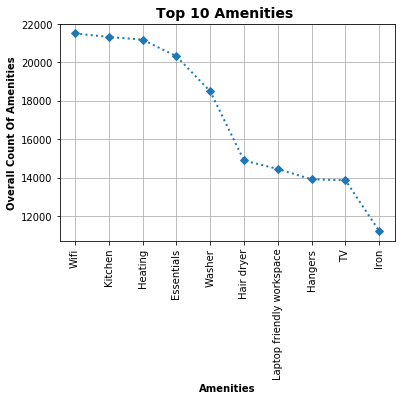

In [13]:
Amenities_Group = Amenities_New.groupby('Amenities')

Amenities_Count = Amenities_Group["Amenities"].count()

Amenities_Count = Amenities_Count.sort_values(ascending=False)

#Amenities_Count = (Amenities_Count/Amenities_Count.sum())*100

plt.plot(Amenities_Count[0:10], linewidth=2.0, marker='D', linestyle=':')
plt.xticks(rotation=90)
plt.xlabel("Amenities", fontweight='bold' )
plt.ylabel("Overall Count Of Amenities" , fontweight='bold')
plt.title("Top 10 Amenities ",fontsize=14, fontweight='bold')

plt.grid()
plt.savefig("Visualizations/Top10_Amenities.png")
plt.show()


### <ins> Observation </ins>

From the above visualization, we can infer that Wifi, Kitchen, Heating, Essentials and Washer are the most important amenities to be considered for the successful of listing.For those who are already in the business and don't have those amenities, make sure the factibility of installing all or some of the amenities to grow your business.

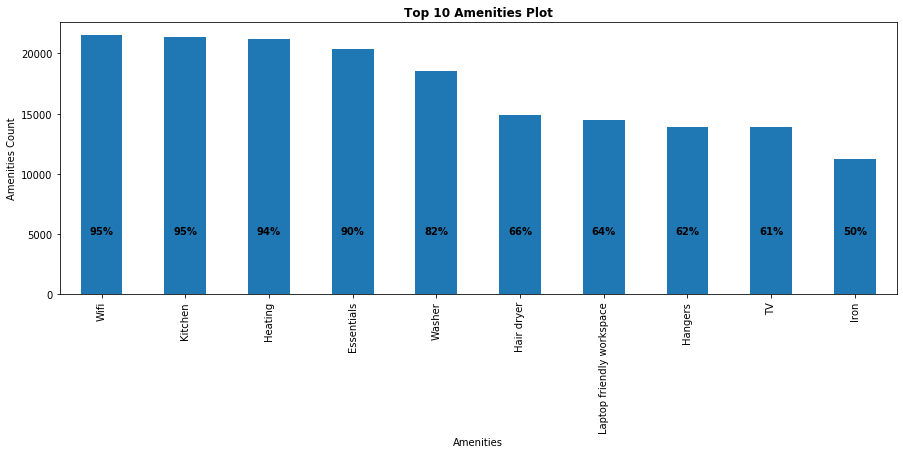

In [14]:
fig, (ax1) = plt.subplots(1,figsize=(15,5))   
Amenities_Count[0:10].plot(kind='bar',ax = ax1)
ax1.set_title('Top 10 Amenities Plot', fontweight='bold')
ax1.set_xlabel('Amenities')
ax1.set_ylabel('Amenities Count')

total = Listings_Summary_df["amenities"].count()

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()/total
    x, y = p.get_xy() 
    ax1.annotate('{:.0%}'.format(height), (p.get_x()+0.5*width, p.get_y()+5000 + height + 0.01),
                 ha = 'center', fontweight='bold')
plt.show()


In [15]:
Top_Airbnb_Locations_Group = Listings_Summary_df.groupby(["latitude","longitude","neighbourhood_cleansed","Rating"])
Top_Location_Price = Top_Airbnb_Locations_Group["price"].sum()
Latitude = Top_Airbnb_Locations_Group["latitude"].max()
Longitude = Top_Airbnb_Locations_Group["longitude"].max()
Place = Top_Airbnb_Locations_Group["neighbourhood_cleansed"].max()
Top_Airbnb_Location_df = pd.DataFrame({"Location Price" : Top_Location_Price,
                                       "Latitude" : Latitude,
                                       "Longitude" : Longitude,
                                        "Place" : Place})
Top_Airbnb_Location_df = Top_Airbnb_Location_df.sort_values("Rating", ascending=False)
Top_Airbnb_Location_df[0:20]

,,,,Location Price,Latitude,Longitude,Place
latitude,longitude,neighbourhood_cleansed,Rating,,,,
52.346203,13.644671,Schmöckwitz/Karolinenhof/Rauchfangswerder,10.0,$99.00,52.346203,13.644671,Schmöckwitz/Karolinenhof/Rauchfangswerder
52.519016,13.459627,Frankfurter Allee Nord,10.0,$21.00,52.519016,13.459627,Frankfurter Allee Nord
52.518904,13.318250,Otto-Suhr-Allee,10.0,$100.00,52.518904,13.318250,Otto-Suhr-Allee
52.518908,13.427348,Karl-Marx-Allee-Süd,10.0,$56.00,52.518908,13.427348,Karl-Marx-Allee-Süd
52.518912,13.486248,Alt-Lichtenberg,10.0,$50.00,52.518912,13.486248,Alt-Lichtenberg
52.518930,13.525894,Marzahn-Süd,10.0,$0.00,52.518930,13.525894,Marzahn-Süd
52.518933,13.469145,Frankfurter Allee Nord,10.0,$40.00,52.518933,13.469145,Frankfurter Allee Nord
52.518944,13.458170,Frankfurter Allee Nord,10.0,$50.00,52.518944,13.458170,Frankfurter Allee Nord
52.518951,13.424355,Alexanderplatz,10.0,$25.00,52.518951,13.424355,Alexanderplatz


In [16]:
#Finding the Top 20 Places using Latitude & Longitude 

from config import gkey

gmaps.configure(api_key=gkey)

import geocoder
from config import gkey

Place_List = []
Address = []
for x in range(0, 20):
    g = geocoder.google([Top_Airbnb_Location_df["Latitude"][x],Top_Airbnb_Location_df["Longitude"][x]], method='reverse', key = gkey)
    Address +=[g.address]
Place_List += [y.split(',') for y in Address]    

Top_Places = []
for x in range(0,20):
    Top_Places += [Place_List[x][0]]

def remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    list = [x.replace("Str.","") for x in list]
    list = [x.replace("  ","") for x in list]
    return list

Top_Places = remove(Top_Places)

Top_Places


['Schmöckwitzer Damm ',
 'Zellestraße A',
 'Cauerstraße ',
 'Strausberger Pl. ',
 'vor dem Minimarkt & Backshop',
 'Zur Alten Börse ',
 'Voigtstraße ',
 'Liebigstraße ',
 'Karl-Marx-Allee ',
 'Dolziger',
 'Joachim-Karnatz-Allee ',
 'Dolziger',
 'Neustädtische Kirchstraße ',
 'Löwestraße ',
 'Eckertstraße A',
 'Rutnikstraße ',
 'Bänschstraße ',
 'Solinger',
 'Dolziger',
 'Am Festungsgraben ']

In [17]:
from config import gkey

gmaps.configure(api_key=gkey)  

locations = Top_Airbnb_Location_df[["Latitude","Longitude"]]
place = Top_Places

#Heat Map Layer for Top 20 Airbnb Places
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations[0:20], point_radius=12)
fig.add_layer(heat_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [18]:
#Marker_Layer for Top 20 Airbnb Places
fig = gmaps.figure()
markers = gmaps.marker_layer(locations[0:20], info_box_content=place[0:20])
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

In [19]:

Airbnb_location = gmaps.symbol_layer(locations[0:10], fill_color="green", stroke_color="green", scale=5)
fig = gmaps.figure()
fig.add_layer(Airbnb_location)
fig

Figure(layout=FigureLayout(height='420px'))

### Host Verification

How many hosts are verified??

In [100]:
#Host Verification
Listings_Summary_df.host_identity_verified.value_counts(normalize=True)

f    0.613691
t    0.386309
Name: host_identity_verified, dtype: float64

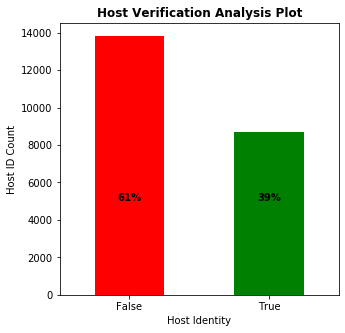

In [98]:
#Host Verification - Plot

fig, (ax1) = plt.subplots(1, figsize=(5,5))   
Listings_Summary_df.groupby('host_identity_verified').size().plot(kind='bar',ax = ax1, color=['red', 'green'])
ax1.set_xticklabels(labels=['False', 'True'], rotation=0)
ax1.set_title('Host Verification Analysis Plot', fontweight='bold')
ax1.set_xlabel('Host Identity')
ax1.set_ylabel('Host ID Count')

total = len(Listings_Summary_df['host_identity_verified'])

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()/total
    x, y = p.get_xy() 
    ax1.annotate('{:.0%}'.format(height), (p.get_x()+0.5*width, p.get_y()+5000 + height + 0.01),
                 ha = 'center', fontweight='bold')
plt.show()

Only about 39% of the hosts are verified (Verified phone number, ID, email address, reviews, etc). <br></br>
Verifying the details is something that hosts often think they are expected to do. <br></br>
Guests might expect the additional trust commanded by verified hosts for their accomodation.

In [219]:
print(Listings_Summary_df.require_guest_phone_verification.value_counts(normalize=True)) 
print(f"\n")
print(Listings_Summary_df.require_guest_profile_picture.value_counts(normalize=True))
print(f"\n")
print(Listings_Summary_df.is_business_travel_ready.value_counts(normalize=True))
print(f"\n")
print(Listings_Summary_df.requires_license.value_counts(normalize=True))
print(f"\n")
print(Listings_Summary_df.is_location_exact.value_counts(normalize=True))
print(f"\n")
print(Listings_Summary_df.host_has_profile_pic.value_counts(normalize=True))
print(f"\n")
print(Listings_Summary_df.has_availability.value_counts(normalize=True))
print(f"\n")
print(Listings_Summary_df.instant_bookable.value_counts(normalize=True))
print(f"\n")
print(Listings_Summary_df.host_is_superhost.value_counts(normalize=True))

f    0.987629
t    0.012371
Name: require_guest_phone_verification, dtype: float64


f    0.993083
t    0.006917
Name: require_guest_profile_picture, dtype: float64


f    1.0
Name: is_business_travel_ready, dtype: float64


t    0.999645
f    0.000355
Name: requires_license, dtype: float64


t    0.743881
f    0.256119
Name: is_location_exact, dtype: float64


t    0.997514
f    0.002486
Name: host_has_profile_pic, dtype: float64


t    1.0
Name: has_availability, dtype: float64


f    0.688099
t    0.311901
Name: instant_bookable, dtype: float64


f    0.866332
t    0.133668
Name: host_is_superhost, dtype: float64


From the above values, its evident that 
1) require_guest_phone_verification, require_guest_profile_picture criteria is not required for any of the hosts from the guests.
2) is_business_travel_ready option is not available in any of the listing provided by aribnb.
3) Some cities require that hosts obtain a license in order to list their homes in Airbnb. Almost 99.99% of the hosts has verified their license and the host has the profile pic.
4) 75% of the properties have the exact location mentioned in the site. Remaining 25% Hosts can Work on providing the exact location so that the guests can easily identify the location.
5) 100% of the listings are available in Berlin.
6) 68% of the hosts have the option of instant booking for the guest accomodation.Remaining 31% of the Hosts can Work on Having this option for the Ease of booking the rooms.
7) Only 13% of the hosts are the superhosts. Superhosts means the top-rated and most experienced hosts, and can increase the host search ranking in Airbnb.

Now lets see if these factors affect with price or not???

In [253]:
# Dropping the below columns since these have only one values.
Listings_Summary_df.drop(['has_availability', 'is_business_travel_ready'], axis=1, inplace=True)

In [33]:
def Factors_Affecting_Price(col, figsize=(8,3)):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=14, y=1, fontweight='bold')
    plt.subplots_adjust(top=0.80) 
    
    Listings_Summary_df.groupby(col).size().plot(kind='bar', ax=ax1, color=['darkorange', 'navy'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title(col + " Count")
    ax1.set_xlabel("")
    
    Listings_Summary_df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['darkorange', 'navy'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median Price')
    ax2.set_xlabel("")
    
    plt.show()

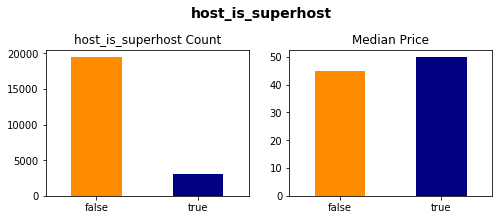

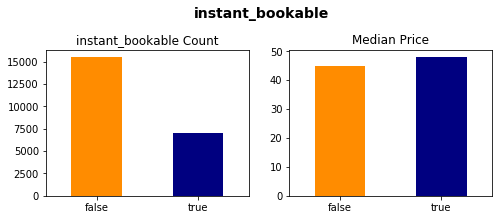

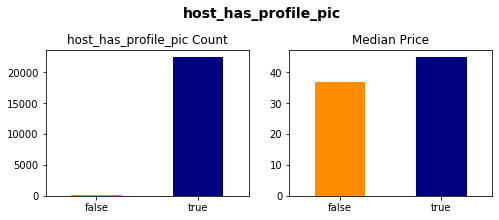

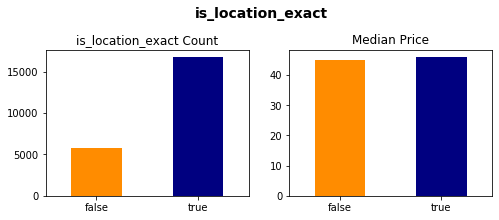

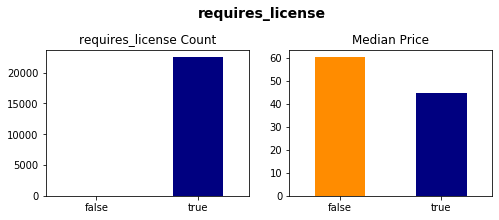

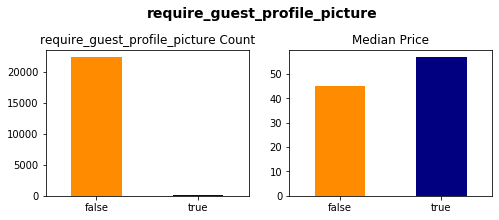

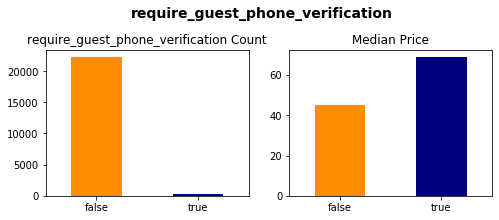

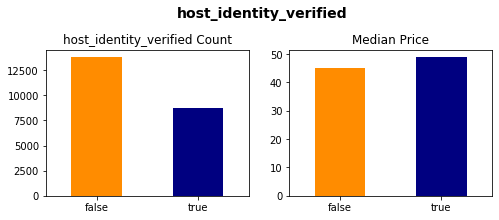

In [34]:
col = ['host_is_superhost', 'instant_bookable',  'host_has_profile_pic', 'is_location_exact', 
       'requires_license',  'require_guest_profile_picture', 'require_guest_phone_verification','host_identity_verified']
 
for x in col:    
    Factors_Affecting_Price(x)

## Time Series Analysis

Source : https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

<b> Question: how have prices changed over time? </b>

The average price per night for Airbnb listings in Berlin has decreased slightly over the last 10 years. 
In 2010, the mean price was 87$ (high), then the price has been drastically reduced to 65$.

In [65]:
Listings_Summary_df["first_review_year"] = Listings_Summary_df.first_review.dt.year
Listings_Summary_df["log_price"] = np.log(Listings_Summary_df.price)

c:\users\saranya\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


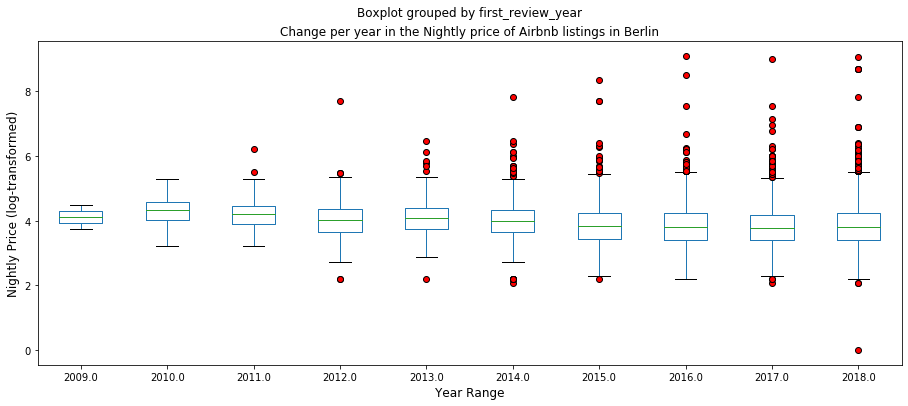

In [66]:
#plt.figure(figsize=(16,6))
colour = dict(markerfacecolor='r', marker='o')
Listings_Summary_df.boxplot(by ='first_review_year', column ='log_price' ,
                            figsize=(15,6), grid = False, flierprops=colour, showcaps=True)    
#sns.boxplot(Listings_Summary_df.first_review.dt.year, np.log(Listings_Summary_df.price))
plt.xlabel('Year Range', fontsize=12)
plt.ylabel('Nightly Price (log-transformed)', fontsize=12)
plt.title('Change per year in the Nightly price of Airbnb listings in Berlin')
plt.show()

c:\users\saranya\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


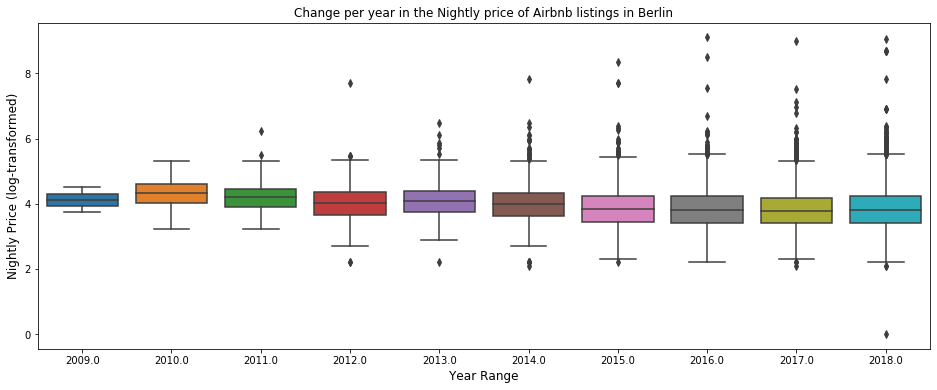

In [63]:
plt.figure(figsize=(16,6)) 
sns.boxplot(Listings_Summary_df.first_review.dt.year, np.log(Listings_Summary_df.price))
plt.xlabel('Year Range', fontsize=12)
plt.ylabel('Nightly Price (log-transformed)', fontsize=12)
plt.title('Change per year in the Nightly price of Airbnb listings in Berlin')
plt.show()

In [16]:
print("Mean nightly price of listings in each year on Airbnb in Berlin:")
print(round(Listings_Summary_df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Berlin:
first_review
2009-01-01    66.00
2010-01-01    87.14
2011-01-01    77.17
2012-01-01    70.29
2013-01-01    68.52
2014-01-01    68.13
2015-01-01    59.52
2016-01-01    62.60
2017-01-01    57.91
2018-01-01    65.32
Name: price, dtype: float64


Are the different patterns in the growth in the number of hosts and the number of listings due to hosts increasingly owning multiple properties?

Answer: there are a number of professional Airbnb management companies which host a large number of listings under a single host profile. The largest manages 1676 listings who is a part of the Belvilla Customer service team under the name 'Kim - BELVILLA', 

c:\users\saranya\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


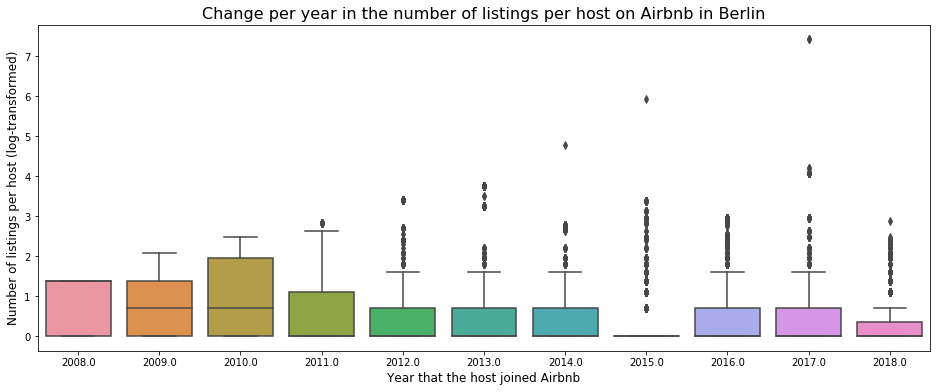

In [51]:
plt.figure(figsize=(16,6))
sns.boxplot(Listings_Summary_df.host_since.dt.year, np.log(Listings_Summary_df.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Berlin', fontsize=16)
plt.show()

In [48]:
print("Average number of listings per host per year on Airbnb in Berlin:")
print(round(Listings_Summary_df.set_index('host_since').host_listings_count.resample('YS').mean(),2))

Average number of listings per host per year on Airbnb in Berlin:
host_since
2008-01-01    2.71
2009-01-01    3.07
2010-01-01    3.89
2011-01-01    2.82
2012-01-01    2.23
2013-01-01    2.36
2014-01-01    1.54
2015-01-01    1.81
2016-01-01    2.17
2017-01-01    4.86
2018-01-01    1.70
Name: host_listings_count, dtype: float64


### <ins> Average Daily Price Per Accomodates </ins>

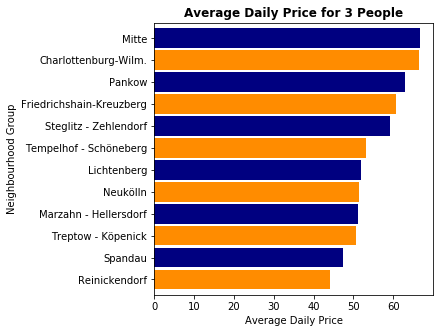

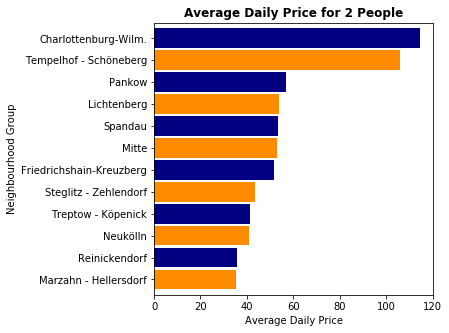

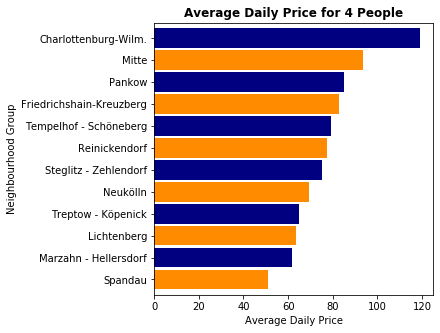

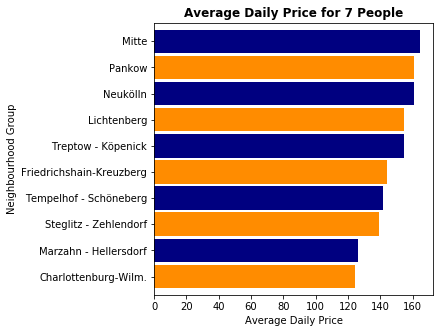

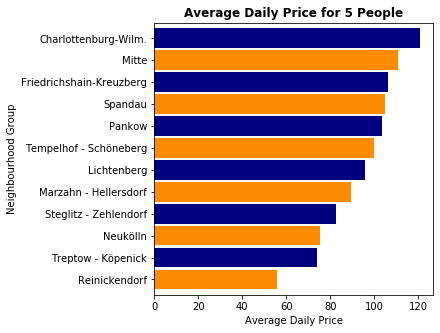

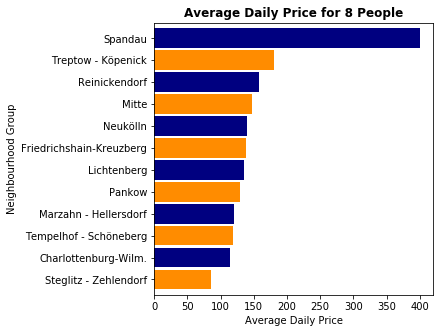

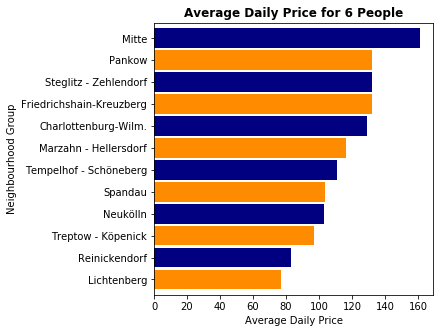

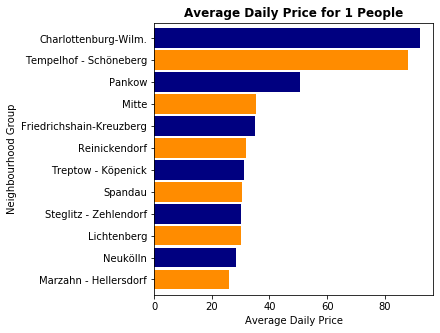

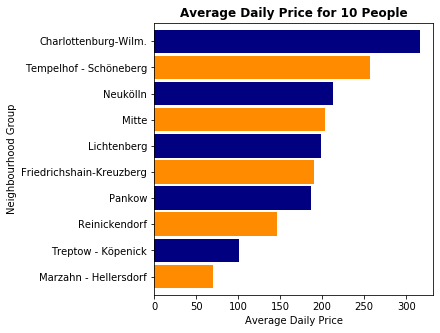

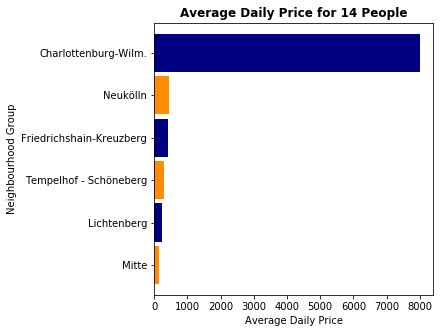

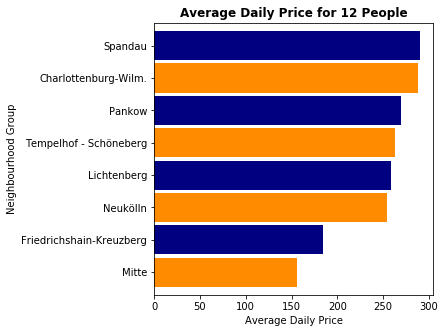

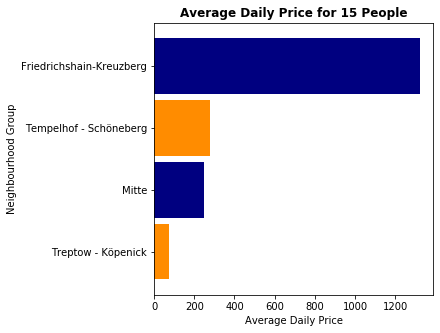

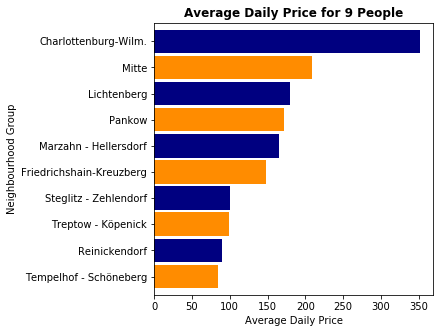

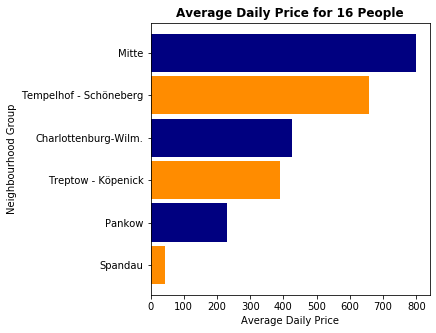

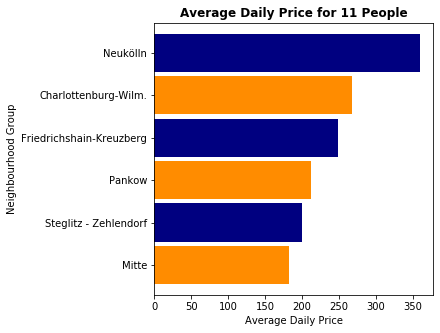

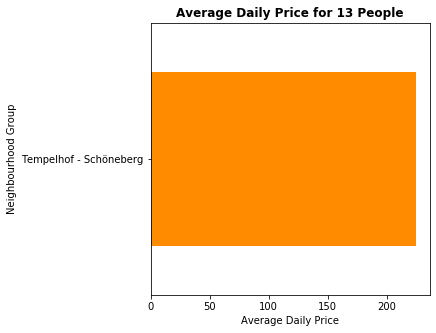

In [48]:
for accom in Listings_Summary_df['accommodates'].unique():
    Accomodates = Listings_Summary_df[Listings_Summary_df['accommodates']==accom]
    Avg_Daily_Price = Accomodates.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=True)
    Avg_Daily_Price.plot.barh(figsize=(5, 5), width = 0.9, color=['darkorange', 'navy'])
    plt.title("Average Daily Price for " + str(accom)  + " People", fontweight="bold")
    plt.xlabel('Average Daily Price')
    plt.ylabel("Neighbourhood Group")
    plt.show()

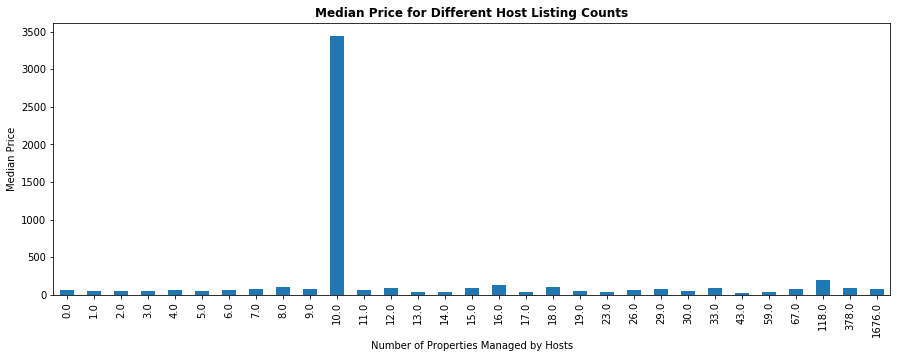

In [64]:
# Median price for different host listing counts
plt.figure()
Listings_Summary_df.groupby('host_listings_count').price.median().plot(kind='bar',figsize=(15,5))
plt.title('Median Price for Different Host Listing Counts', fontweight='bold')
plt.xlabel('Number of Properties Managed by Hosts')
plt.ylabel('Median Price');

<b>How many other listings the host manages in Airbnb? Does it mean Hosts having more properties will gain higher prices??</b>

From the Median Price for Different Host Listing Counts plot, <br> </br>
1) It is evident that a host who manages more properties does not result in a listing gaining higher prices.  <br> </br>
2) The Price Range is almost similar irrespective of the Host listing Count except for the Hosts who is managing 10 properties. May be few are expensive properties for one fine stay.




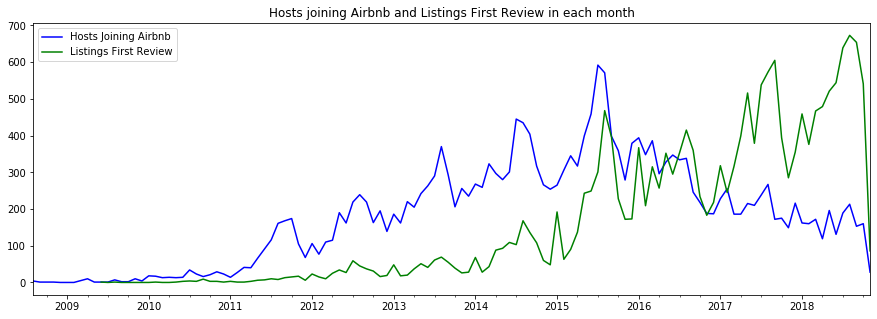

In [59]:
plt.figure(figsize=(15,5))
Listings_Summary_df.set_index('host_since').resample('MS').size().plot(label='Hosts Joining Airbnb', color='blue')
Listings_Summary_df.set_index('first_review').resample('MS').size().plot(label='Listings First Review', color='green')
plt.title('Hosts joining Airbnb and Listings First Review in each month')
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.show()

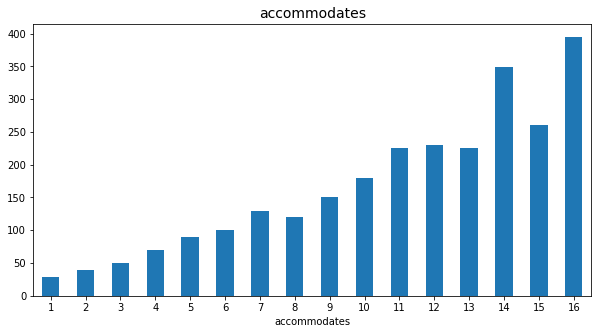

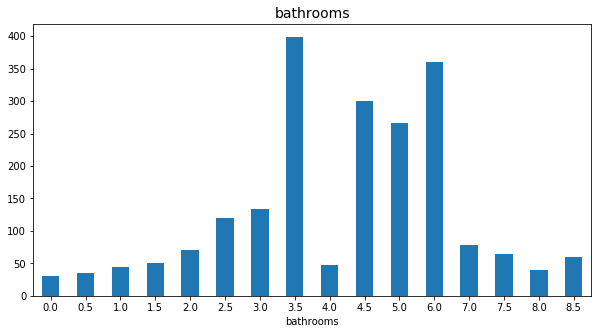

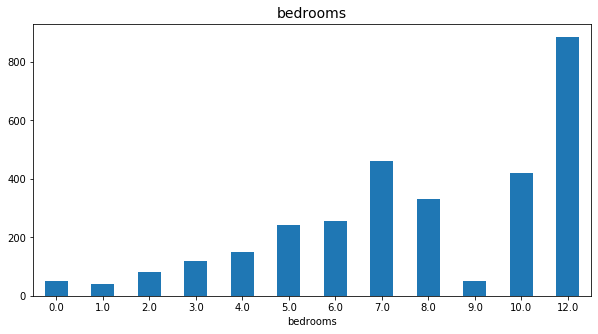

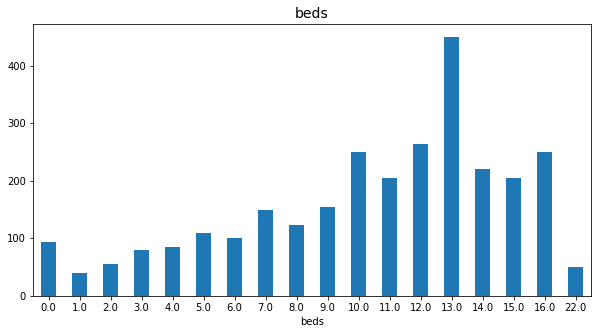

In [37]:
def accom_bath_bed_plot(col):

    plt.figure(figsize=(10,5))
    Listings_Summary_df.groupby(col).price.median().plot(kind='bar')
    plt.title(col, fontsize=14)
   #plt.xlabel('Number of guests accommodated', fontsize=13)
    #plt.ylabel('Median price (£)', fontsize=13)
    plt.xticks(rotation=0)
    #plt.xlim(left=0.5)
    plt.show()

accom_bath_bed_plot('accommodates')
accom_bath_bed_plot('bathrooms')
accom_bath_bed_plot('bedrooms')
accom_bath_bed_plot('beds')

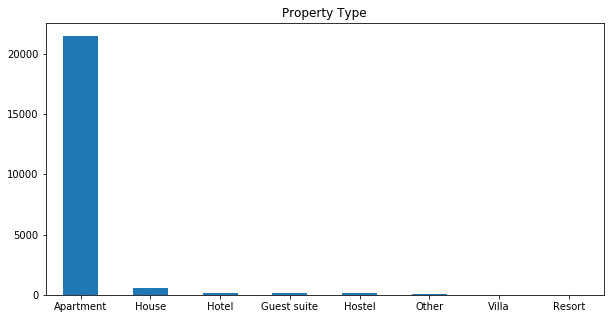

Apartment      0.952111
House          0.024876
Hotel          0.007272
Guest suite    0.005809
Hostel         0.005676
Other          0.003680
Villa          0.000443
Resort         0.000133
Name: property_type, dtype: float64

In [51]:
plt.figure(figsize=(10,5))
Listings_Summary_df["property_type"].value_counts().plot(kind='bar')
plt.title("Property Type")
plt.xticks(rotation=0)
plt.show()

Listings_Summary_df["property_type"].value_counts(normalize=True)

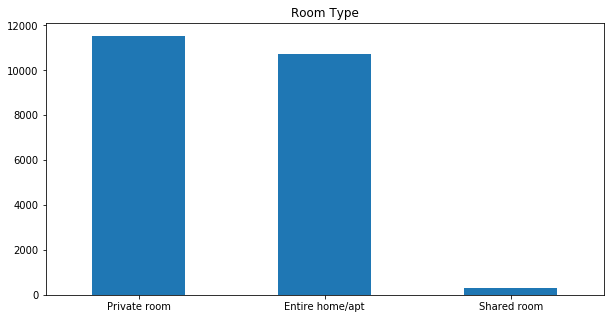

Private room       0.511440
Entire home/apt    0.475435
Shared room        0.013125
Name: room_type, dtype: float64

In [52]:
plt.figure(figsize=(10,5))
Listings_Summary_df["room_type"].value_counts().plot(kind='bar')
plt.title("Room Type")
plt.xticks(rotation=0)
plt.show()

Listings_Summary_df["room_type"].value_counts(normalize=True)

In [8]:
Calendar_Summary_df.price = Calendar_Summary_df.price.str.replace(",","")
Calendar_Summary_df.price = Calendar_Summary_df.price.str.strip('$')
Calendar_Summary_df.price.fillna(0, inplace=True)
Calendar_Summary_df.price = Calendar_Summary_df.price.astype('float')

In [6]:
#Calendar_Listings_df["price"].dropna(how="any")
Calendar_Summary_df.price.value_counts()

$50.00       68088
$40.00       63537
$35.00       60185
$45.00       56931
$55.00       51832
             ...  
$1,205.00        1
$859.00          1
$764.00          1
$1,199.00        1
$760.00          1
Name: price, Length: 684, dtype: int64

In [33]:
Calendar_Summary_df.head()

,date,available,price
listing_id,,,
2015,2019-09-10,f,NaN
2015,2019-09-09,f,NaN
2015,2019-09-08,f,NaN
2015,2019-09-07,f,NaN
2015,2019-09-06,f,NaN


Text(0, 0.5, 'Number of Listings Available')

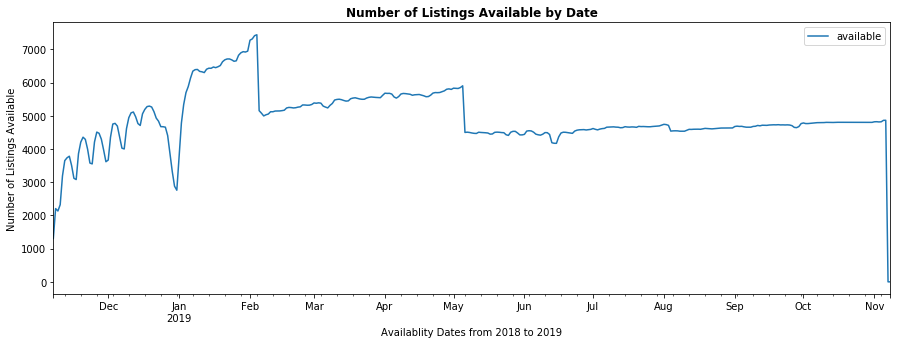

In [3]:
#Plotting Graph for Number of listings available by Date

Availability = Calendar_Summary_df[Calendar_Summary_df.available == "t"].groupby(['date']).size().to_frame(name='available').reset_index()
Availability = Availability.set_index('date')

Availability.plot(kind='line', y='available', figsize=(15, 5))
plt.title('Number of Listings Available by Date', fontweight="bold")
plt.xlabel('Availablity Dates from 2018 to 2019')
plt.ylabel('Number of Listings Available')

From the above graph we can infer that,
1) The busiest Month is November (i.e, less number of listings available and lots of people travelling) 
2) During February, we can see that the number of listings available is more. (i,e, less number of people travelling). It mightbe the best time to tavel for cheaper accomodations.

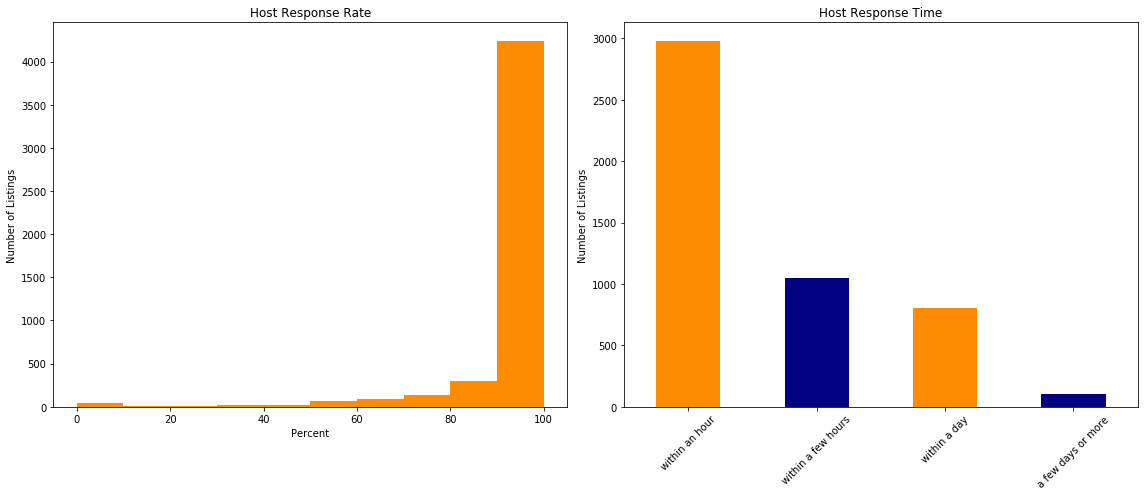

In [133]:
Reviews = Listings_Summary_df[Listings_Summary_df['number_of_reviews']>=10]
fig = plt.figure(figsize=(16,7))
ax = fig.add_subplot(121)
Rate = Reviews['host_response_rate'].dropna()
Rate.plot.hist('host_response_rate', ax=ax, color=["darkorange", "navy"])
plt.title("Host Response Rate")
plt.ylabel("Number of Listings")
plt.xlabel("Percent")

ax = fig.add_subplot(122)
Time = Reviews['host_response_time'].dropna()
Time = Reviews['host_response_time'].value_counts()
Time.plot.bar(width=0.5, rot=45, ax=ax, color=["darkorange", "navy"])
plt.title("Host Response Time")
plt.ylabel("Number of Listings")

plt.tight_layout()
plt.show()
